In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('https://grantmlong.com/data/streeteasy_rents_june2016.csv')

In [3]:
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


(array([1779., 1885.,  617.,  295.,  161.,   86.,   72.,   54.,   32.,
          19.]),
 array([ 1250.,  3125.,  5000.,  6875.,  8750., 10625., 12500., 14375.,
        16250., 18125., 20000.]),
 <a list of 10 Patch objects>)

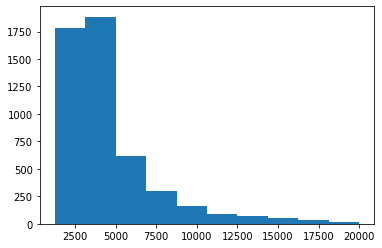

In [4]:
plt.hist(x=df['rent'])

In [5]:
df.shape

(5000, 20)

In [6]:
df.columns

Index(['rental_id', 'building_id', 'rent', 'bedrooms', 'bathrooms',
       'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee',
       'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator',
       'has_dishwasher', 'has_patio', 'has_gym', 'neighborhood', 'submarket',
       'borough'],
      dtype='object')

In [7]:
df.describe()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


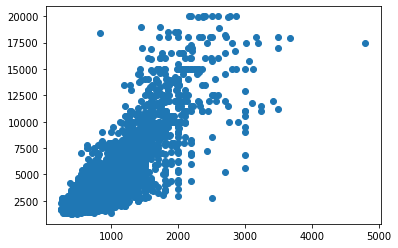

In [8]:
plt.scatter(df['size_sqft'],df['rent'])

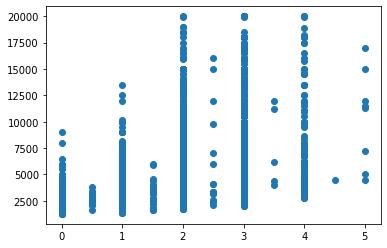

In [9]:
plt.scatter(df['bedrooms'],df['rent'])

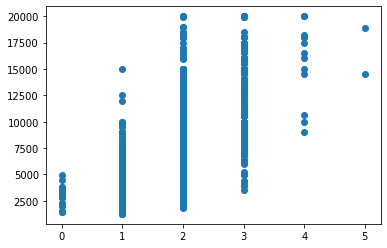

In [10]:
plt.scatter(df['bathrooms'],df['rent'])

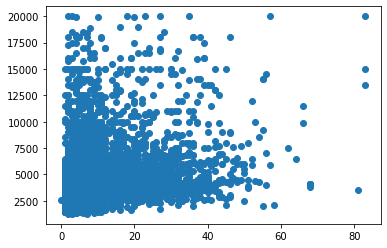

In [11]:
plt.scatter(df['floor'],df['rent'])

In [12]:
df.dtypes

rental_id             int64
building_id           int64
rent                  int64
bedrooms            float64
bathrooms             int64
size_sqft             int64
min_to_subway         int64
floor               float64
building_age_yrs      int64
no_fee                int64
has_roofdeck          int64
has_washer_dryer      int64
has_doorman           int64
has_elevator          int64
has_dishwasher        int64
has_patio             int64
has_gym               int64
neighborhood         object
submarket            object
borough              object
dtype: object

In [13]:
df.corr()['rent'].sort_values(ascending=False)[1:]

size_sqft           0.808784
bathrooms           0.733644
bedrooms            0.531200
floor               0.272351
has_elevator        0.120822
has_doorman         0.099106
has_dishwasher      0.096631
has_washer_dryer    0.096136
has_gym             0.093737
has_roofdeck        0.081286
has_patio           0.058260
min_to_subway       0.003652
building_id        -0.001235
no_fee             -0.091769
building_age_yrs   -0.122302
rental_id          -0.142801
Name: rent, dtype: float64

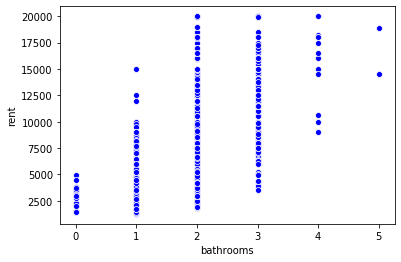

In [15]:
sns.scatterplot(data=df,x='bathrooms',y='rent',color='blue')

In [16]:
df.corr()['rent']['bathrooms']

0.7336443859581325

Rent and bathroom have a positive linear relationship

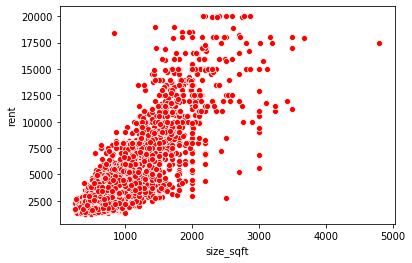

In [17]:
sns.scatterplot(data=df,x='size_sqft',y='rent',color='red')

In [18]:
df.corr()['rent']['size_sqft']

0.8087835060658338

Rent and sqfeet has a positive linear relationship

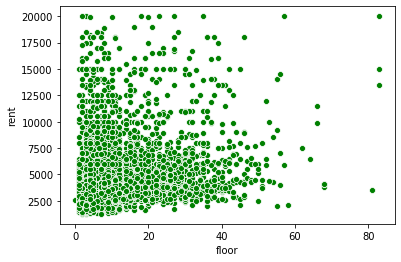

In [19]:
sns.scatterplot(data=df,x='floor',y='rent',color='green')

In [20]:
df.corr()['rent']['floor']

0.27235110961903614

Rent and floor have positive non linear relationship

In [23]:
beta,alpha=np.polyfit(df.size_sqft,df.rent,1)

In [24]:
print('beta: %0.3f, alpha: %0.1f.'%(beta,alpha))

beta: 5.384, alpha: -416.6.


In [25]:
print('Based on this analysis, a 700 square foot apartment would rent for $%0.2f'%(beta*700+alpha))

Based on this analysis, a 700 square foot apartment would rent for $3351.98


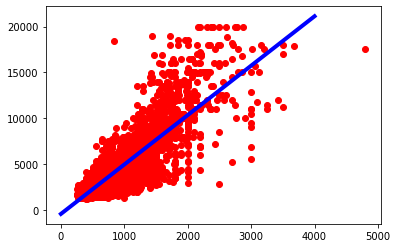

In [27]:
plt.plot(df.size_sqft,df.rent,color='red',marker='.',markersize=12,linestyle='none')
plt.plot([0,4000],[alpha,alpha+beta*4000],color='blue',linewidth=4)


In [28]:
df['rent_predicted']=df['rent']*beta+alpha
df['rent_residual']=df['rent_predicted']-df['rent']

In [31]:
df['rent_predicted']

0       13311.685057
1       61495.136533
2       15734.316696
3       23809.755491
4       25397.925120
            ...     
4995    13850.047644
4996    35519.141743
4997     8730.219448
4998    18291.538981
4999    23809.755491
Name: rent_predicted, Length: 5000, dtype: float64

In [32]:
df['rent_residual']

0       10761.685057
1       49995.136533
2       12734.316696
3       19309.755491
4       20602.925120
            ...     
4995    11200.047644
4996    28844.141743
4997     7031.219448
4998    14816.538981
4999    19309.755491
Name: rent_residual, Length: 5000, dtype: float64

### Using statsmodels for Single Variable Linear Regression

In [33]:
# Add a constant to our existing dataframe for modeling purposes
df = sm.add_constant(df)
est = sm.OLS(df['rent'],
df[['const', 'size_sqft']]).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     9453.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:49:24   Log-Likelihood:                -44353.
No. Observations:                5000   AIC:                         8.871e+04
Df Residuals:                    4998   BIC:                         8.872e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -416.5609     56.478     -7.376      0.0

In [35]:
est = sm.OLS(df['rent'],df[['const','size_sqft','bathrooms','floor','has_doorman']]).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     3151.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:50:39   Log-Likelihood:                -43859.
No. Observations:                5000   AIC:                         8.773e+04
Df Residuals:                    4995   BIC:                         8.776e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1362.8677     59.283    -22.989      

In [37]:
est = sm.OLS(df['rent'],df.drop(['neighborhood','submarket','borough','rent','rent_predicted','rent_residual'],axis=1)).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     858.1
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:51:07   Log-Likelihood:                -43700.
No. Observations:                5000   AIC:                         8.743e+04
Df Residuals:                    4983   BIC:                         8.754e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -777.1793    100.937  

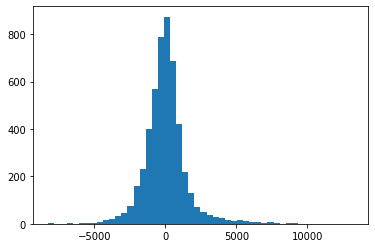

In [38]:
plt.hist(est.resid,bins=50)
plt.show()


In [39]:
# This create a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# Fitting of  independent variables with rent
dependent_vars = ['bedrooms','bathrooms','min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym']
X = df[dependent_vars]
lm.fit(X, df.rent)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))


Estimated intercept coefficient: -515.5040360810199
Number of coefficients: 13


In [42]:
pd.DataFrame(lm.coef_, index = dependent_vars, columns = ['Est. coefficient'])

,Est. coefficient
bedrooms,417.730687
bathrooms,3171.816130
min_to_subway,-22.630204
floor,49.132507
building_age_yrs,-1.488370
no_fee,-344.120712
has_roofdeck,-4.475219
has_washer_dryer,191.475476
has_doorman,-41.004582
has_elevator,400.797299


In [43]:
# First five values of predicted rent
lm.predict(X)[0:5]

array([2629.06488344, 6479.31777692, 3710.34863476, 5994.05257186,
       3764.12600492])

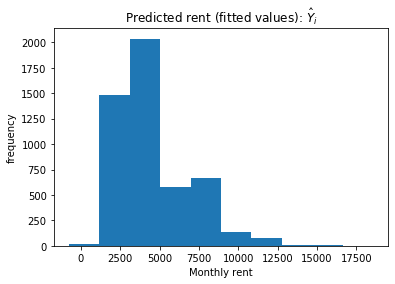

In [45]:
plt.hist(lm.predict(X))
plt.title("Predicted rent (fitted values): $\hat{Y}_i$")
plt.xlabel("Monthly rent")
plt.ylabel("frequency")
plt.show()

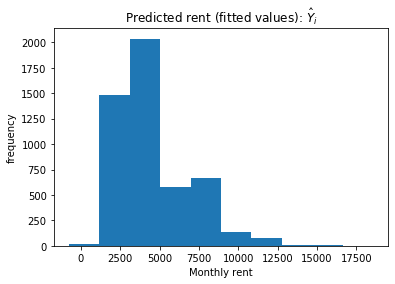

In [46]:
plt.hist(lm.predict(X))
plt.title("Predicted rent (fitted values): $\hat{Y}_i$")
plt.xlabel("Monthly rent")
plt.ylabel("frequency")
plt.show()


In [48]:
# sum of squares of rent residuals
print('%0.2f' % np.sum((df['rent']-lm.predict(X))**2))

17730479762.04
